<a href="https://colab.research.google.com/github/Daniel-Fernandez-951/build-week/blob/master/Daniel_Fernandez_DS20_BUILD_WEEK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topics for Build Project

In [ ]:
import pandas as pd
import numpy as np

# Topic 1:
## Analyze word frequency of target vocabulary

1.   Pick the "Paper of Record's" articles as influenial subject
    - Filter articles by sentiment (use sentiment dataset)
          - Articles limited to those with sentiment analysis conducted
    - Compare positive sentiment to negative sentiment
        -  Further limit based on keyword set presence
    - Show frequency of + and - sentiment of words


 2. Looking for overwhelming support or critisim; subject words can be commonly used vocabulary of theories, political movements, etc.



**Datasets** 
  -  **Sentiment Analysis**
      - ISSUE: data in R format
        - https://rdrr.io/cran/sentimentr/man/nyt_articles.html#heading-4
      - **Resources**
        - https://stackoverflow.com/questions/24605702/good-dataset-for-sentiment-analysis
        - https://positivewordsresearch.com/sentiment-analysis-resources/
        - https://github.com/ruchigupta19/NY-Times-dataset-Analysis
        - https://rpubs.com/pparacch/236096

---



# Sentiment Analysis 
- Data and Related Material:
  - Blog post: https://blog.gdeltproject.org/gdelt-2-0-our-global-world-in-realtime/
  -

## Description of Sentiment Data
- Source: http://data.gdeltproject.org/documentation/GDELT-Global_Knowledge_Graph_Codebook-V2.pdf
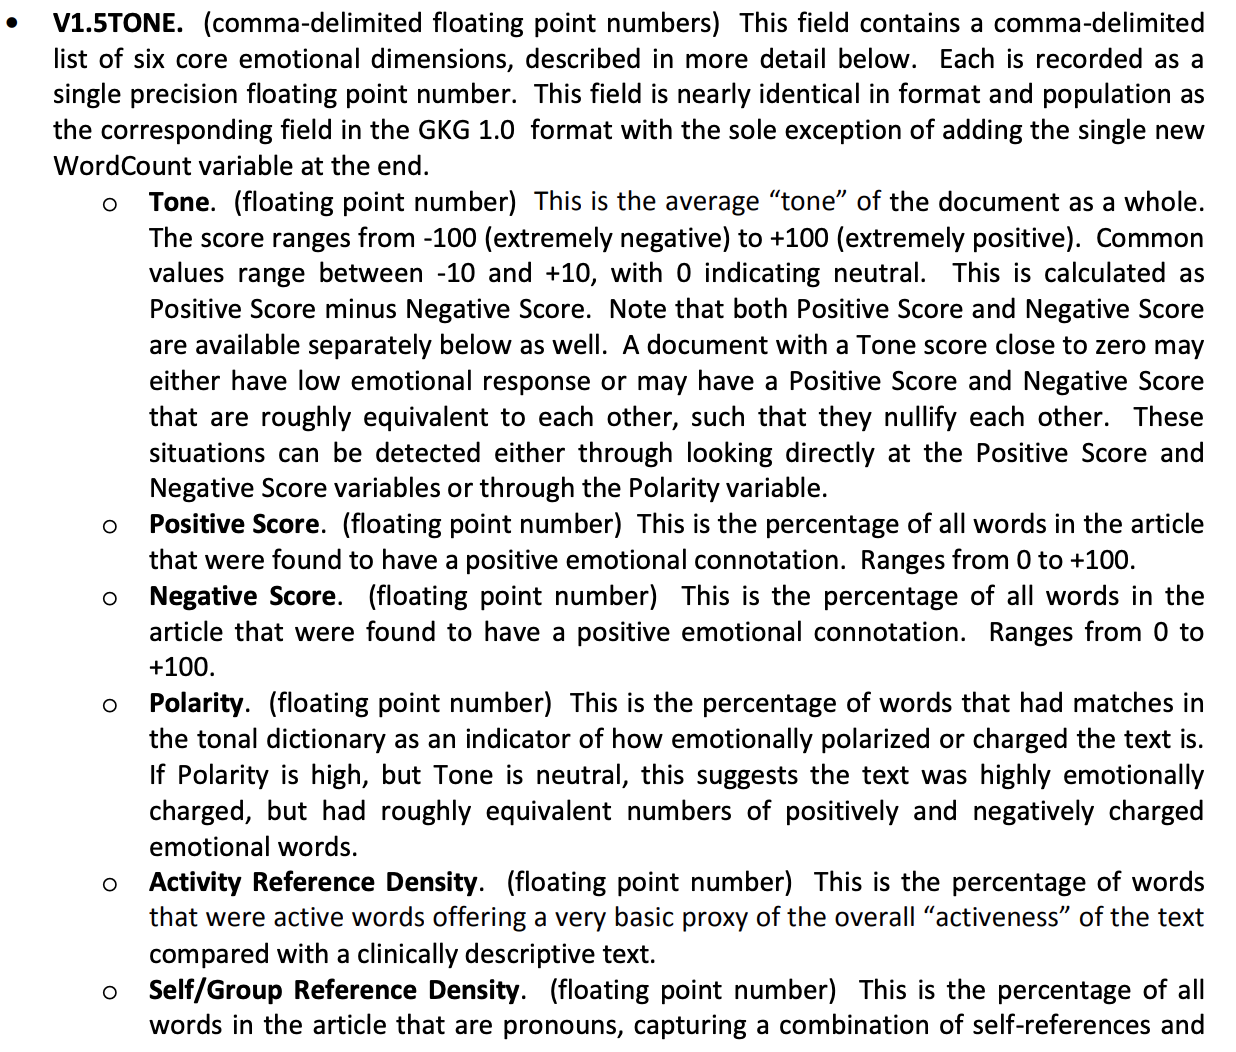

### Use Sentiment and Subject to filter articles
- Refrence the filtered list to get the article based on the `Unique Record Identifiers`.
  - This will get the specific article to search for keywords.

# Topic 2:
## COVID Analysis

## Sources Raw COVID Data by age
- **Description / Manual:** https://github.com/owid/covid-19-data/tree/master/public/data

## Comorbitities Contributing to COVID Deaths
- https://healthdata.gov/dataset/conditions-contributing-deaths-involving-coronavirus-disease-2019-covid-19-age-group-and-0#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}},view-grid:{columnsWidth:[{column:!Condition++Group,width:214},{column:!Condition,width:283}]}}

- Provisional COVID-19 Death Counts by Sex, Age, and State:

    https://healthdata.gov/dataset/provisional-covid-19-death-counts-sex-age-and-state/resource/e8ad3ebc-1f2f-4f0e-8d63#{view-grid:{columnsWidth:[{column:!State,width:99},{column:!Age++group,width:154},{column:!COVID-19++Deaths,width:114},{column:!Total++Deaths,width:219},{column:!Pneumonia++Deaths,width:143},{column:!Footnote,width:971}]}}

- Totals Larger Groups small breakdown:

  https://data.cdc.gov/api/views/9bhg-hcku/rows.csv?accessType=DOWNLOAD

    - Documentation:

      https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku

In [ ]:
# Load data

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df

In [ ]:
print(df.shape)
df.isnull().sum()

(44363, 41)


iso_code                             262
continent                            524
location                               0
date                                   0
total_cases                          603
new_cases                            801
new_cases_smoothed                  1583
total_deaths                         603
new_deaths                           801
new_deaths_smoothed                 1583
total_cases_per_million              865
new_cases_per_million                865
new_cases_smoothed_per_million      1648
total_deaths_per_million             865
new_deaths_per_million               865
new_deaths_smoothed_per_million     1648
new_tests                          28892
total_tests                        28525
total_tests_per_thousand           28525
new_tests_per_thousand             28892
new_tests_smoothed                 27008
new_tests_smoothed_per_thousand    27008
tests_per_case                     28424
positive_rate                      28041
tests_units     

In [ ]:
# CDC Data (Comorbitity and Age)

!wget "https://healthdata.gov/node/3438587/download"

--2020-09-18 06:05:44--  https://healthdata.gov/node/3438587/download
Resolving healthdata.gov (healthdata.gov)... 54.243.212.26
Connecting to healthdata.gov (healthdata.gov)|54.243.212.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1506443 (1.4M) [text/csv]
Saving to: ‘download’

download            100%[===================>]   1.44M  --.-KB/s    in 0.08s   

2020-09-18 06:05:44 (19.1 MB/s) - ‘download’ saved [1506443/1506443]



In [ ]:
# CDC Data grouped by age and comorbitity

df_cmorb = pd.read_csv('/content/download')
print(df_cmorb.shape)
df_cmorb.head(5)

(12260, 10)


,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,09/13/2020,02/01/2020,09/12/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,137.0,NaN
1,09/13/2020,02/01/2020,09/12/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,636.0,NaN
2,09/13/2020,02/01/2020,09/12/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1628.0,NaN
3,09/13/2020,02/01/2020,09/12/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,4532.0,NaN
4,09/13/2020,02/01/2020,09/12/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,10863.0,NaN


In [ ]:
#  Test Detailed individual breakdown across US and Terretories

!wget "https://healthdata.gov/node/3376186/download" -O detailed_covid.csv


--2020-09-18 06:19:08--  https://healthdata.gov/node/3376186/download
Resolving healthdata.gov (healthdata.gov)... 54.243.212.26
Connecting to healthdata.gov (healthdata.gov)|54.243.212.26|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.cdc.gov/api/views/vbim-akqf/rows.csv?accessType=DOWNLOAD [following]
--2020-09-18 06:19:08--  https://data.cdc.gov/api/views/vbim-akqf/rows.csv?accessType=DOWNLOAD
Resolving data.cdc.gov (data.cdc.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cdc.gov (data.cdc.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘detailed_covid.csv’

detailed_covid.csv      [      <=>           ] 377.43M  5.66MB/s    in 74s     

2020-09-18 06:20:23 (5.09 MB/s) - ‘detailed_covid.csv’ saved [395761628]



In [ ]:
test_detail = pd.read_csv("/content/detailed_covid.csv")
test_detail.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3662325, 11)

In [ ]:
((test_detail['death_yn'] == 'Yes').sum()) / (((test_detail['death_yn'] == 'No').sum()) + ((test_detail['death_yn'] == "Missing").sum()))


0.043759575775127166